# Gjevik og Wang Fagerland - Kapittel 3 og 5 

En interaktiv oversettelse

## Bruk av Python

### Innledning

I det følgende har vi oversatt kapittel 3 i boka [Gjevik og Fagerland](https://bibsys-k.alma.exlibrisgroup.com/leganto/readinglist/citation/9752674050002204?institute=47BIBSYS_UBO&auth=SAML) fra Matlab
til Python.  Mens bokas kapittel 3 er skrevet uten å anta at man kan noe om
Matlab fra før, vet vi at dagens typiske student i MEK1100 har forkunnskaper i
Python som går langt forbi den introduksjonen som gis her.  Vi har likevel
prøvd å oversette kapittel 3 i boka forholdsvis *ordrett*.

For grunnleggende introduksjon til Python anbefales læreboka i [IN1900](https://www.uio.no/studier/emner/matnat/ifi/IN1900/h19/ressurser/pensum.html) 
samt [Python-versjonen](https://www.uio.no/studier/emner/matnat/math/MAT1110/v19/appendixpython.pdf) av Matlab-appendikset i læreboka i [MAT1110](https://bibsys-k.alma.exlibrisgroup.com/leganto/readinglist/citation/9848288890002204?institute=47BIBSYS_UBO&auth=SAML).  Det er også en elektronisk versjon av
[Matlab-appendikset](https://www.uio.no/studier/emner/matnat/math/MAT1110/v16/fvlabokkort.pdf) i læreboka i MAT1110.

Vi skal basere oss på [Matplotlib](https://matplotlib.org/) for å generere
grafikk.

For en sammenlikning av visualisering med Matplotlib, Mayavi og Matlab anbefales igjen [Python appendikset til MAT1110](https://www.uio.no/studier/emner/matnat/math/MAT1110/v19/appendixpython.pdf).


## Litt grunnleggende Python

### Oppstart, grensesnitt, kommentarer

På Linux kan du starte Python ved å skrive *python* eller *ipython* i et terminalvindu. Jupyter starter man for eksempel med *jupyter notebook*. Det er andre måter å starte Python som vi ikke diskuterer her.
For å sjekke hvilken versjon av Python man kjører kan man ganske enkelt gjøre som under

In [1]:
import sys
print(sys.version)

3.8.0 | packaged by conda-forge | (default, Nov 22 2019, 19:11:19) 
[Clang 9.0.0 (tags/RELEASE_900/final)]


Boksen over er en interaktiv IPython kode celle. I denne kan man skrive inn Python kode og så kjører man denne ved å trykke på boksen med Run over. Et jupyter-dokument inneholder typisk mange slike bokser, og boksene kan være koblet sammen. Det vil si at kode man beregner i én boks vil kunne regnes som kjent når man kommer lenger ned i dokumentet. Ta et enkelt eksempel

In [2]:
a = 2
b = 3

Skriv litt tekst i mellom her og sjekk så at `a` og `b` lever i boksen under

In [3]:
print(a+b)

5


Stemmer!

Dette med mange forskjellig bokser gjør Jupyter filer litt forskjellig fra vanlige Python programmer.  Faktisk så er Jupyter heller ikke strengt tatt bundet opp mot Python, men virker like bra med andre programmer, som for eksempel MATLAB. Her kommer vi bare til å bruke Python om ikke annet er sagt.

Dersom du ønsker å restarte en beregning midt i et Jupyter document, så kan du slette alle tidligere variable gjennom en [magic-function](https://ipython.readthedocs.io/en/stable/interactive/magics.html)


In [4]:
%reset -f
try:
    print(a+b)
except NameError: 
    print('a og b er ikke definert!')

a og b er ikke definert!


Merk at gjennom magic-funksjonen `%reset -f` så slettes alle variable som har blitt definert opp til nå. Det finnes mange magic-funksjoner. Noen av de viktigste er:

   * `%matplotlib inline`  (For plotting inline med matplotlib)
   * `%load` (laster inn kode fra eksternt skript)
   * `%precision 4` (Setter antall tall etter komma for pretty-printing)
   * `%pwd` (Returnerer present working directory)
   * `%pylab` (Hvis du jobber mye med numpy og matplotlib)
   * `%run` (Kjør en navngitt fil som et program)

In [5]:
%pwd

'/Users/mikaelmortensen/MySoftware/MEK1100/notebooks'

Når man lager et Jupyter dokument så er koden sannsynligvis godt dokumnetert med alt det man skriver i text-boksene (som denne). I rene Python-filer har man ingen tekst-bokser, så man må lære seg å dokumentere koden sin på annen måte. Linjekommentarer i Python starter med tegnet
`#` og alt fra dette tegnet og ut linja vil oppfattes som kommentar.  Kommentarer over flere linjer er definert ved 3 tegn før og etter kommentaren.

In [6]:
# Dette er en kommentar i Python kode

"""Dette er en kommentar som 
går over
flere 
linjer
"""

'Dette er en kommentar som \ngår over\nflere \nlinjer\n'

Merk at Jupyter oppfatter teksten mellom de to triplequote'ene `"""` som en streng, og spytter den ut som output over. Teksten mellom triplequotes er ganske riktig en streng i Python også, men den skrives ikke ut i et vanlig Python program om man ikke ber om det. Man kan for eksempel gjøre 

In [7]:
s = """Dette er en kommentar som 
går over
flere 
linjer 
og som fanges opp av variabelen `s`
"""

Variabelen `s` kan skrives ut, men ikke automatisk (som default).

In [8]:
print(s)

Dette er en kommentar som 
går over
flere 
linjer 
og som fanges opp av variabelen `s`



# Importere `numpy` for numerikk

Matematiske konstanter og funksjoner som kan ta argumenter som er både
skalarer, lister og arrayer gjøres tilgjengelig fra \texttt{numpy}:
\begin{verbatim}

In [9]:
import numpy as np
%precision 3
print(np.array((np.pi, np.sin(1))))

[3.142 0.841]


In [10]:
print(np.sin([1, 2]), np.sin(np.array([1, 2])))

[0.841 0.909] [0.841 0.909]


Her merker vi oss at `[1, 2]` er ei liste mens `np.array([1, 2])` er et objekt av type `numpy.ndarray`, sistnevnte er å foretrekke for numerisk arbeid.  `array()` diskuteres i seksjon ???. Merk også at om vi tar bort `np.array` fra den første print statementen, så blir resultatet en tuple

In [11]:
print((np.pi, np.sin(1)))

(3.141592653589793, 0.8414709848078965)


Magic funksjonen `precision` styrer bare output for `numpy`-variabler, så her printes Python objektet `(np.pi, np.sin(1))` som et vanlig tuple. Merk at en tuple er en `immutable` type. Det vil si en type som ikke kan forandres etter at den er skapt:

In [12]:
t = (0, 1, 2)
print(t[2:])
try:
    t[2] = 2
except TypeError:
    print("TypeError - 'tuple' object does not support item assignment")

(2,)
TypeError - 'tuple' object does not support item assignment


# Importere `matplotlib.pyplot` for grafikk

Vi skal bruke `matplotlib.pyplot` for å generere grafikk.  Følgende tre linjer tegner opp ei rett linje mellom punktene (0,1) og (1,2):

<IPython.core.display.Javascript object>


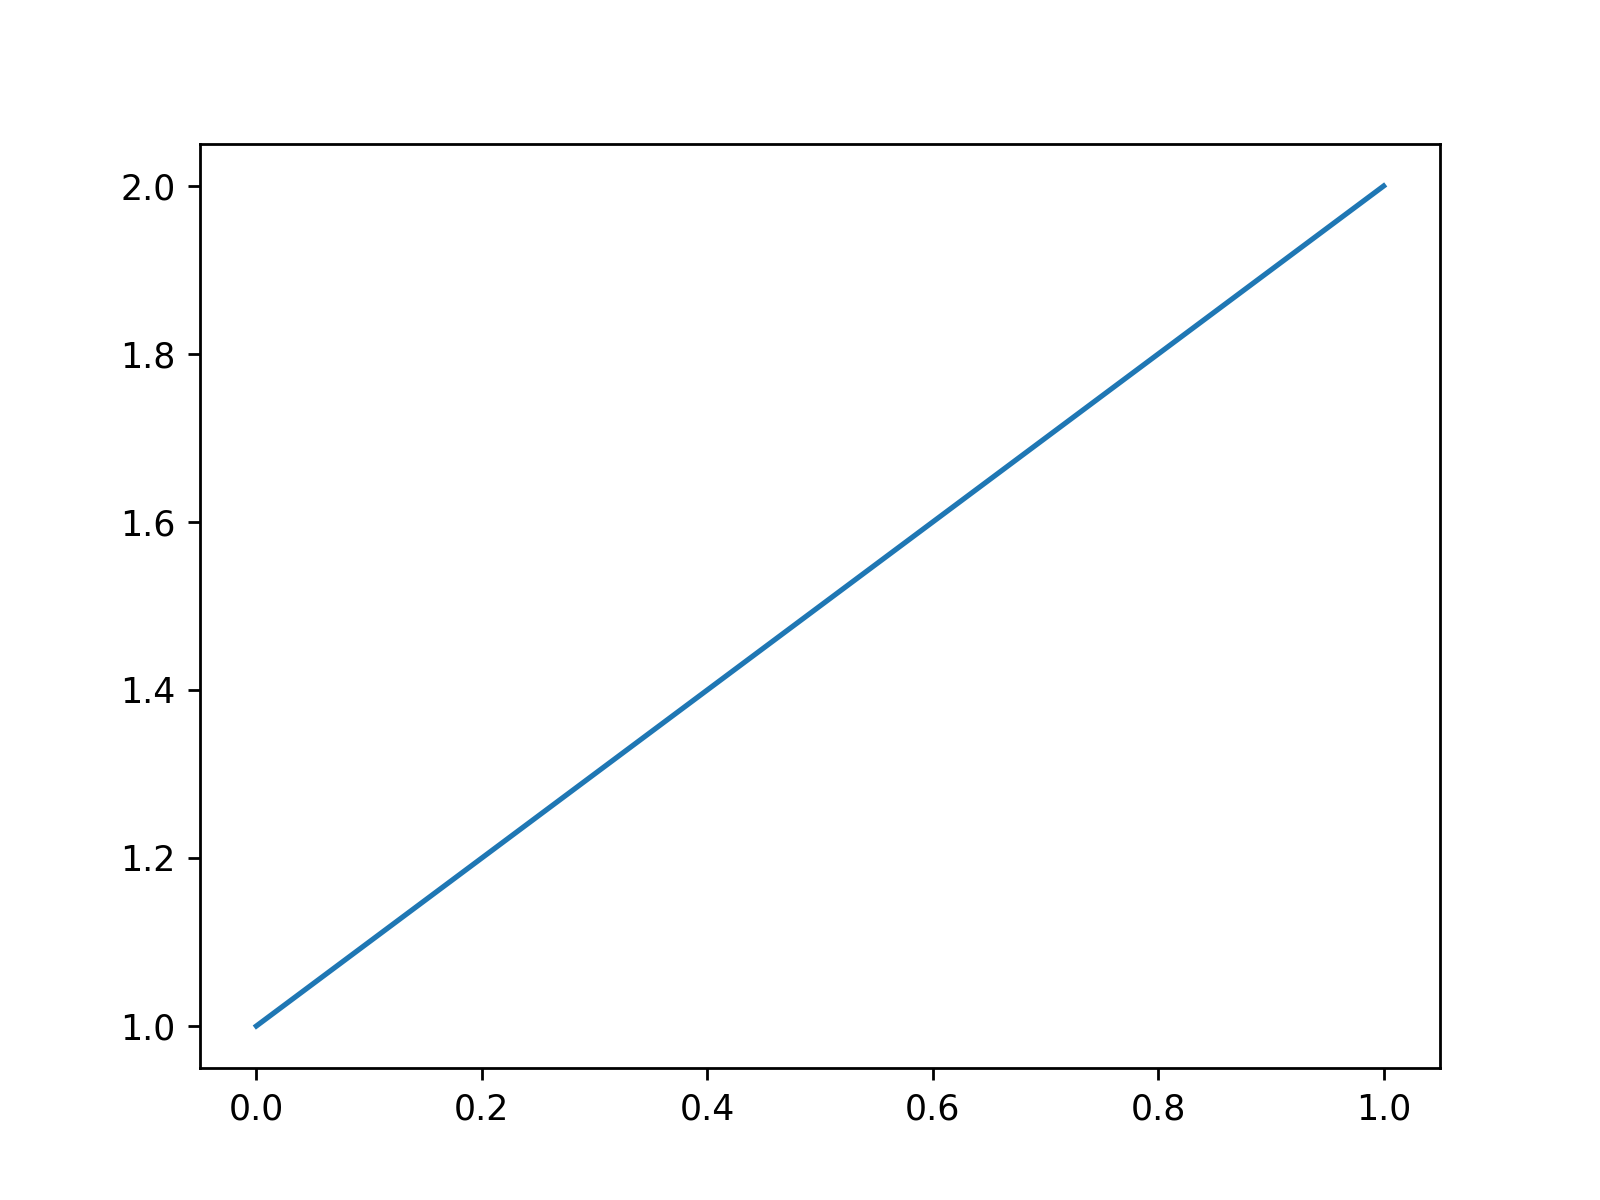

In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot([0, 1], [1, 2])

Merk at figuren er interaktiv siden vi har brukt `%matplotlib notebook`. Man kan få inline plot ved å bruke `%matplotlib inline`. Da vil man ikke kunne gå inn og zoome, eller lagre figuren i etterhånd.

Man kan skru interaktivitet på ved hjelp av `plt.interactive(True)`, og av med `plt.interactive(False)`. Da kan man velge å vente med all plottingen til programmet er ferdig, og så avslutte med kommandoen `plt.show()`, som da vil starte plottingen. Men i Jupyter er det altså mer vanlig å bruke magic functions.

## `pylab`

`pylab` er en modul som tidligere ble mye brukt for å lage et MATLAB-liknende miljø i Python. Gjennom

    from pylab import *

fikk man importert både `matplotlib.pyplot` og `numpy` pluss en del andre funksjoner som hadde akkurat tilsvarende navn i MATLAB. I dag finnes fremdeles `pylab` som en modul i `matplotlib`, men det er ikke lenger anbefalt og modulen ses sjelden i bruk. Istedenfor anbefaler man å bruke

    import matplotlib.pyplot as plt
    import numpy as np

i starten av en modul, og så bruke prefiksene `plt` og `np`. Se for eksempel [denne linken](https://matplotlib.org/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related) for en noe mer utfyllende forklaring.

`matplotlib` var den første gode softwaren i Python for 1D/2D plotting, og den var i lengre tid nesten enerådende. Dessverre gikk hovedutvikleren, [John Hunter](https://en.wikipedia.org/wiki/John_D._Hunter), bort i 2012, og siden den gang har det kommet mange nye programmer på banen. Noen som bør nevnes er

   * [Bokeh](https://docs.bokeh.org/en/latest/index.html)
   * [Plotly](https://plot.ly/python/)
   * [MayaVi](https://docs.enthought.com/mayavi/mayavi/)
   * [Seaborn]()
   

## Bokeh

`Bokeh` er en moderne software som spesielt egner seg for interaktive plot, og plot for web. Man kan generere HTML filer direkte fra `bokeh`. Et eksempel på interaktivt plot er vist under.

In [14]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()
opts = dict(plot_width=250, plot_height=250, min_border=0)

p1 = figure(**opts)
r1 = p1.circle([1,2,3], [4,5,6], size=20)

p2 = figure(**opts)
r2 = p2.circle([1,2,3], [4,5,6], size=20)

t = show(row(p1, p2), notebook_handle=True)

Loading BokehJS ...

Merk at `circle` gir markerplot med dotter. Man kan nå, etterpå, endre på plottene over. Oppdater først venstre plot over ved å bruke `r1`, og sett fargen til hvit.

In [15]:
r1.glyph.fill_color = "white"
push_notebook(handle=t)

Oppdater nå høyre plot til rosa.

In [16]:
r2.glyph.fill_color = "pink"
push_notebook()

Lag et nytt plot

In [17]:
p3 = figure(**opts)
r3 = p3.circle([1,2,3], [4,5,6], size=20)

# get a handle to update the shown cell with
t2 = show(p3, notebook_handle=True)

In [18]:
t2

Merk at `t2` er `handle` for output boksen over. Oppdater nå plot `r3` og plot `r1` med orange farge

In [19]:
r3.glyph.fill_color = "orange"
push_notebook(handle=t2)

In [20]:
r1.glyph.fill_color = "orange"
push_notebook(handle=t)

In [21]:
t3 = show(p2, notebook_handle=True)

In [22]:
r2.glyph.fill_color = "red"
push_notebook()

In [23]:
r2.glyph.fill_color = "blue"
push_notebook(handle=t3)

In [24]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [25]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [26]:
x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

In [27]:
p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5),
           background_fill_color='#efefef')
r = p.line(x, y, color="#8888cc", line_width=1.5, alpha=0.8)

In [28]:
def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()

In [29]:
show(p, notebook_handle=True)

In [30]:
interact(update, f=["sin", "cos"], w=(0,50), A=(1,10), phi=(0, 20, 0.1))

interactive(children=(Dropdown(description='f', options=('sin', 'cos'), value='sin'), IntSlider(value=1, descr…

<function __main__.update(f, w=1, A=1, phi=0)>